In [36]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

#Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

In [2]:
ls

chest_xray/  chest-xray-pneumonia.zip  Untitled.ipynb


In [3]:
mainDIR = os.listdir("chest_xray/")

In [4]:
print(mainDIR)

['val', 'test', '.DS_Store', 'train']


In [5]:
PATH="chest_xray/"

In [23]:
train_folder = PATH + "train/"
val_folder = PATH + "val/"
test_folder = PATH + "test/"

In [24]:
os.listdir(train_folder)

['PNEUMONIA', 'NORMAL', '.DS_Store']

In [25]:
train_norm = train_folder  + "NORMAL/"
train_pneum = train_folder  + "PNEUMONIA/"

In [26]:
len(train_norm)

24

In [27]:
rand_norm = np.random.randint(0, len(os.listdir(train_norm)))
norm_pic = os.listdir(train_norm)[rand_norm]

In [28]:
norm_pic_adress = train_norm + norm_pic

In [29]:
norm_load = Image.open(norm_pic_adress)

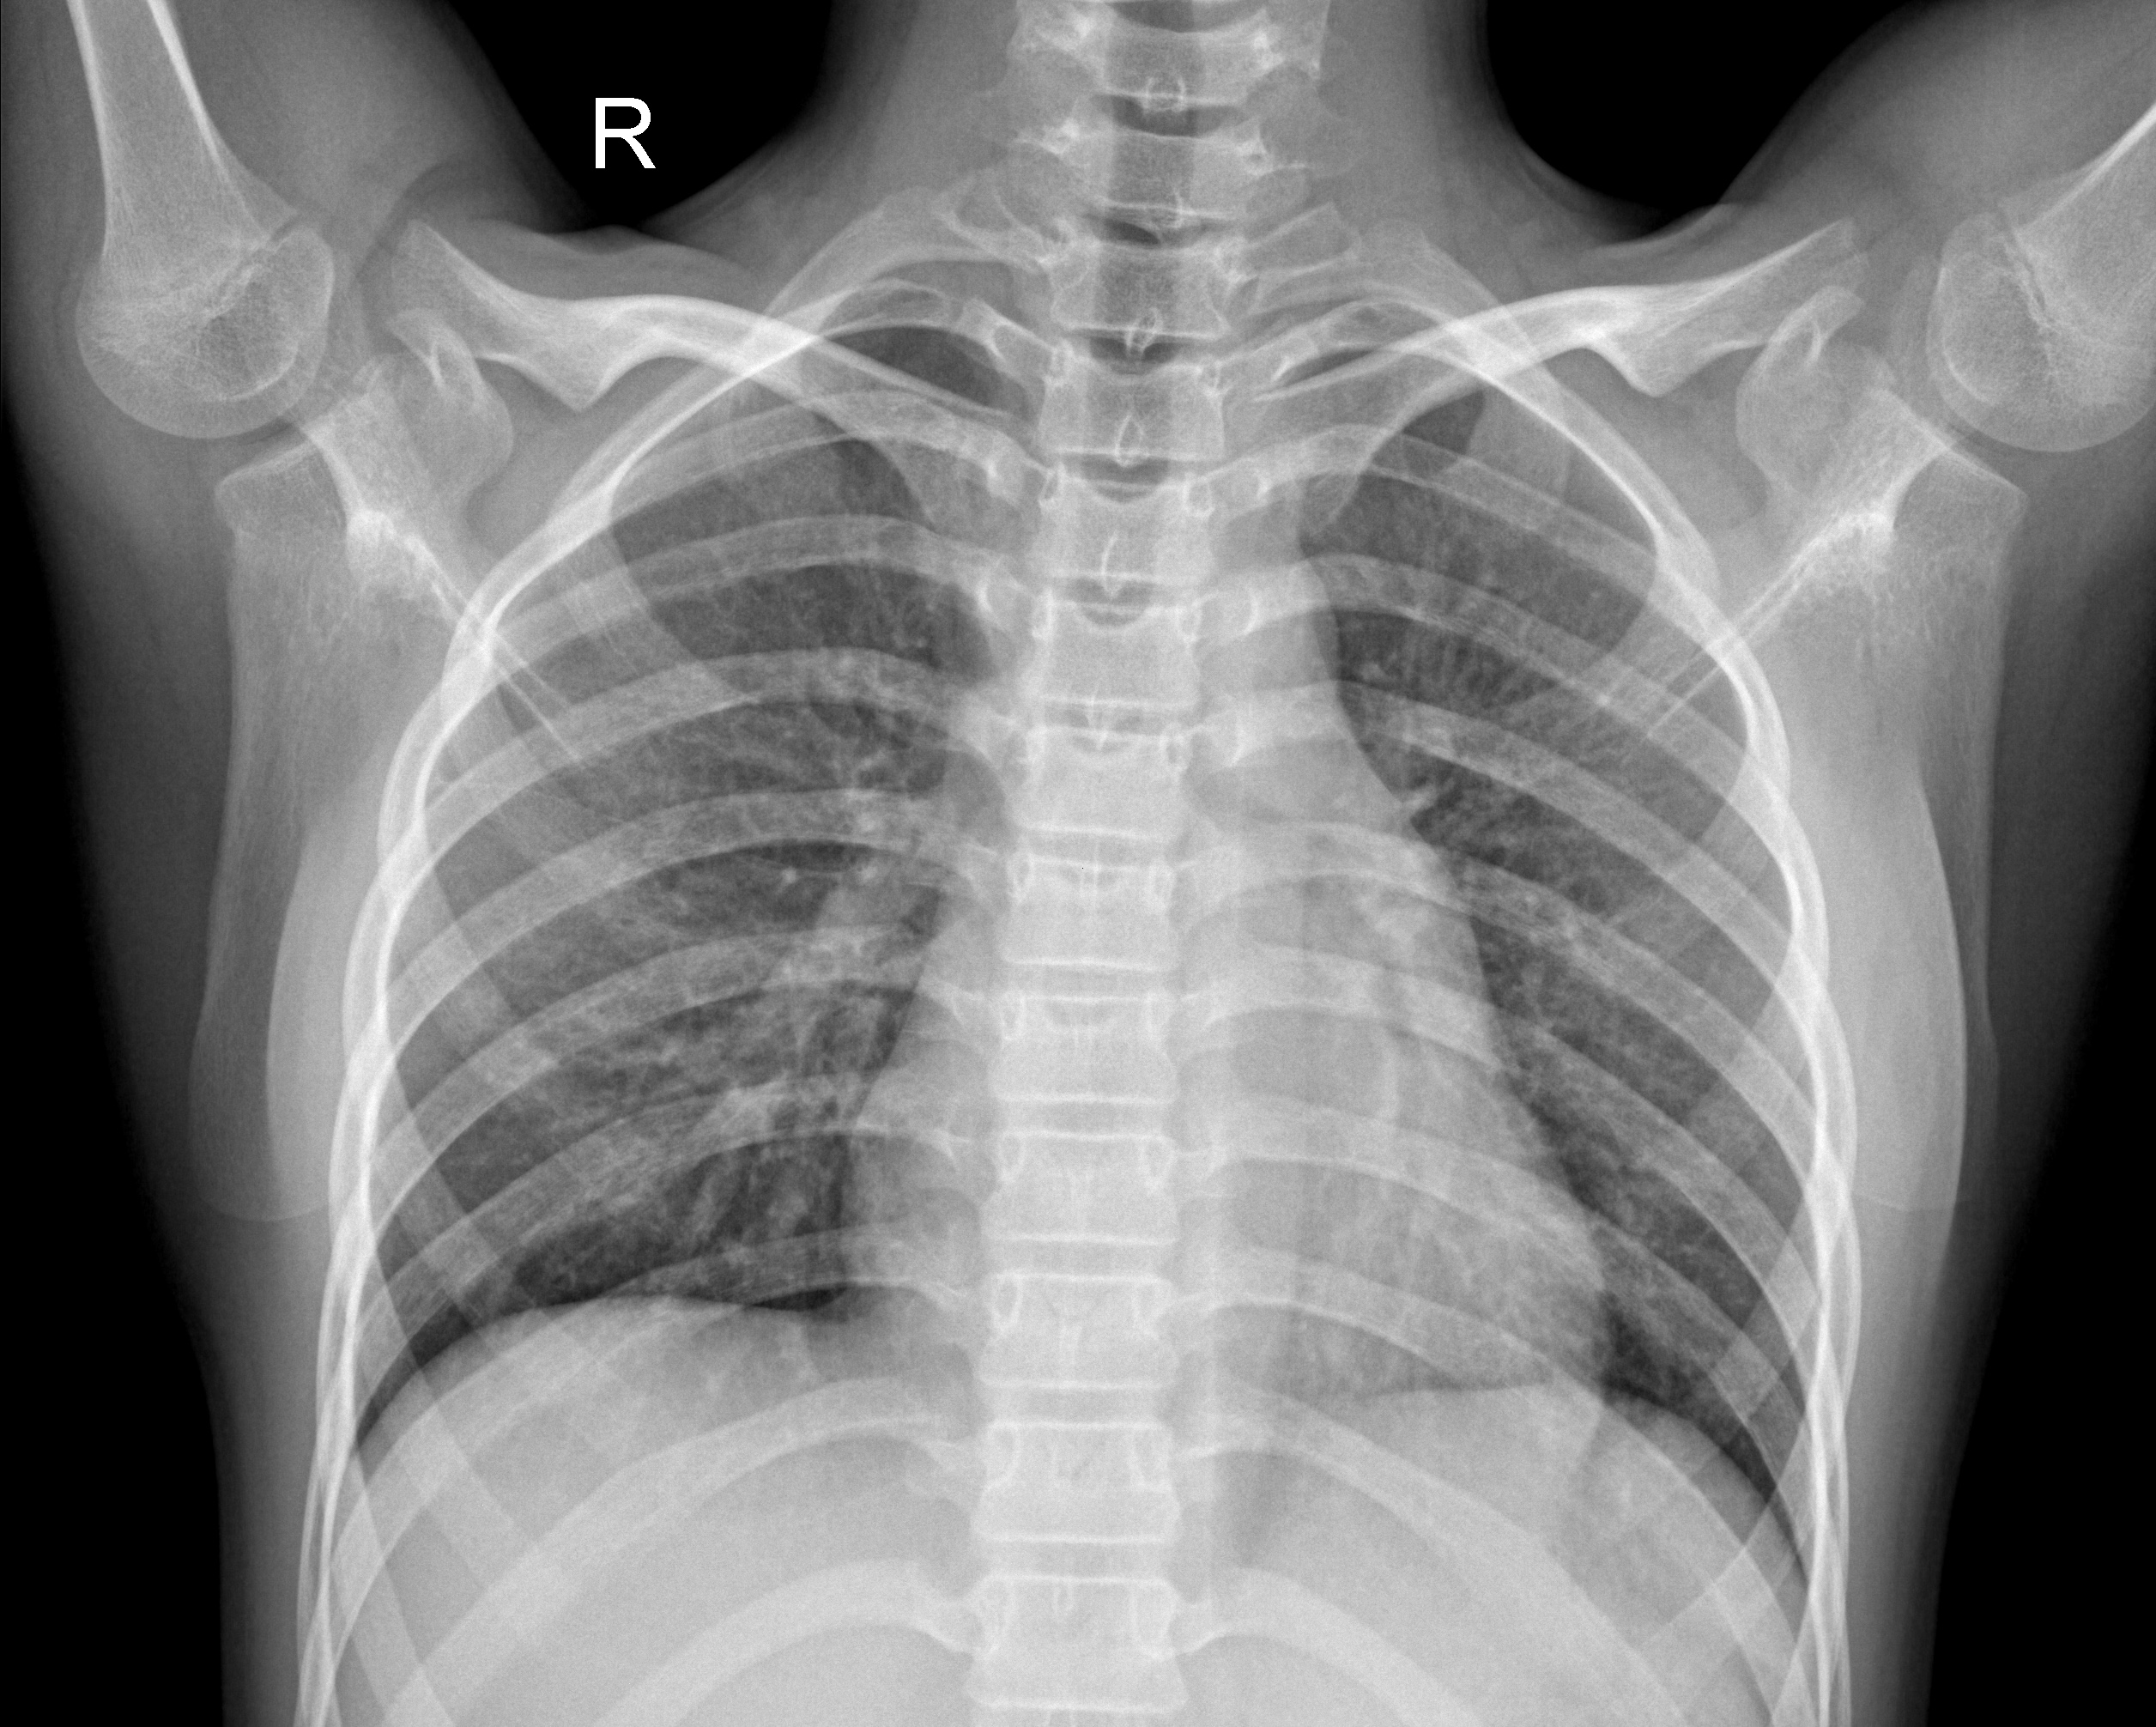

In [39]:
norm_load

# Построение модели нейроной сети

In [40]:
cnn = Sequential()

cnn.add(Conv2D(32, (3,3), activation="relu", input_shape = (64,64, 3)))

cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(32, (3,3), activation="relu"))

cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation="relu", units=128))
cnn.add(Dense(1, activation="sigmoid"))

cnn.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Подготовка данных для модели

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range= 0.2, zoom_range = 0.2, horizontal_flip=True)
#shear_range - угол поворота картинки

In [42]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [43]:
training_set = train_datagen.flow_from_directory(train_folder, target_size=(64,64), batch_size = 32, 
                                                 class_mode = "binary")

validation_set = test_datagen.flow_from_directory(val_folder, target_size = (64, 64), batch_size=32,
                                                 class_mode="binary")

test_set = test_datagen.flow_from_directory(test_folder, target_size = (64,64), batch_size = 32,
                                           class_mode = "binary")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [44]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

В предыдущей сводке можно увидеть количество признаков в каждом слое сети

In [45]:
cnn_model = cnn.fit_generator(training_set, steps_per_epoch=163, epochs=10, validation_data=validation_set,
                             validation_steps = 624)

Epoch 1/10
163/163 [==============================] - 218s 1s/step - loss: 0.3388 - acc: 0.8553 - val_loss: 0.6689 - val_acc: 0.6250
Epoch 2/10
163/163 [==============================] - 188s 1s/step - loss: 0.2258 - acc: 0.9047 - val_loss: 0.2991 - val_acc: 0.9375
Epoch 3/10
163/163 [==============================] - 196s 1s/step - loss: 0.1971 - acc: 0.9195 - val_loss: 0.3822 - val_acc: 0.8125
Epoch 4/10
163/163 [==============================] - 193s 1s/step - loss: 0.1831 - acc: 0.9260 - val_loss: 0.7120 - val_acc: 0.6875
Epoch 5/10
163/163 [==============================] - 192s 1s/step - loss: 0.1752 - acc: 0.9337 - val_loss: 0.6899 - val_acc: 0.7500
Epoch 6/10
163/163 [==============================] - 193s 1s/step - loss: 0.1530 - acc: 0.9413 - val_loss: 0.3733 - val_acc: 0.7500
Epoch 7/10
163/163 [==============================] - 200s 1s/step - loss: 0.1676 - acc: 0.9385 - val_loss: 0.6094 - val_acc: 0.6875
Epoch 8/10
163/163 [==============================] - 192s 1s/step - 

In [47]:
test_acc = cnn.evaluate_generator(test_set, steps=624)

In [48]:
print("Accuracy: {} %".format(test_acc[1]* 100))

Accuracy: 89.2512325390304 %


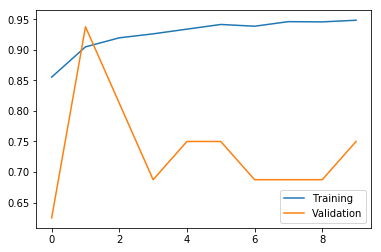

In [52]:
plt.plot(cnn_model.history["acc"], label = "Training")
plt.plot(cnn_model.history["val_acc"], label="Validation")
plt.legend();